In [1]:
import pandas as pd
#Starting Values
'''

2022:
Drought Code (DC):  378.21136474609375
Duff Moisture Code (DMC):  117.234375
Fine Fuel Moisture Code (FFMC):  80.76947021484375

Factors FFMC:
hourly.temperature_2m
hourly.relative_humidity_2m
hourly.wind_speed_10m
hourly.rain


Factors DMC:
hourly.temperature_2m
hourly.relative_humidity_2m
hourly.rain

Factors DC:
hourly.temperature_2m
hourly.rain


2015:
Drought Code (DC):  370.92425537109375
Duff Moisture Code (DMC):  65.2578125
Fine Fuel Moisture Code (FFMC):  94.29084014892578


2019:
Drought Code (DC):  429.4921569824219
Duff Moisture Code (DMC):  110.5078125
Fine Fuel Moisture Code (FFMC):  80.40735626220703


Estacao Mais Proxima:
35.83699035644531
Drought Code (DC):  458.97113037109375
Duff Moisture Code (DMC):  52.3828125
Fine Fuel Moisture Code (FFMC):  94.76251983642578


'''

#Incendio Ocorreu 2022-07-05T18:00

dmet = pd.read_csv('Samples/CopernicusToOpenMeteo/nearestStationInfodd.csv')

In [16]:
# Filter the DataFrame
dmet_filtered = dmet[dmet['hourly.time'].str.contains('T12:00')]
dmet_filtered.to_csv('Samples/CopernicusToOpenMeteo/nearestStationInfoMidDay.csv', index=False)

AttributeError: Can only use .str accessor with string values!

In [52]:
import FWI

'''
38.681640625
Drought Code (DC):  522.2682495117188
Duff Moisture Code (DMC):  90.1777114868164
Fine Fuel Moisture Code (FFMC):  95.599609375



28.100541223673762
dc 467.90113037109376
dmc 58.829143776
ffmc 94.81344966063021
bui 89.51995800670996
isi 9.147038163306119


ffmc 93.5298753966565
dmc 64.065504516
dc 476.61513037109376
isi 12.42426914859001
bui 95.90326936727152
fwix 35.677944925945454


'''

#print(dmet.head())
start_index = 0 + 6 # O FWI é calculado a partir das 12h
MONTH = 6
LAT = 40.95

FFMCPrev = 91.59619140625
DMCPrev = 69.2323989868164
DCPrev = 494.86199951171875
RAIN = 0.0


hora = dmet_filtered.iloc[start_index]['hourly.time']
print(hora)
TEMP = dmet_filtered.iloc[start_index]['hourly.temperature_2m']
RH = dmet_filtered.iloc[start_index]['hourly.relative_humidity_2m']
WIND = dmet_filtered.iloc[start_index]['hourly.wind_speed_10m']
#RAIN = dmet_filtered.iloc[start_index]['hourly.precipitation']

ffmc = FWI.FFMC(TEMP,RH,WIND,RAIN,FFMCPrev)
dmc = FWI.DMC(TEMP,RH,RAIN,DMCPrev,LAT,MONTH)
dc = FWI.DC(TEMP,RAIN,DCPrev,LAT,MONTH)
isi = FWI.ISI(WIND, ffmc)
bui = FWI.BUI(dmc,dc)
fwix = FWI.FWI(isi, bui)

print("ffmc", ffmc)
print("dmc", dmc)
print("dc", dc)
print("isi", isi)
print("bui", bui)
print("fwix", fwix)



'''
2015-06-23T12:00
ffmc 89.0521362307027
dmc 66.69184613200001
dc 483.99713037109376
isi 7.09673527920399
bui 99.20803888969236
fwix 24.818934832111758
'''

2015-06-26T12:00
ffmc 94.92741798384142
dmc 76.03519242681641
dc 503.88199951171873
isi 14.476084577669832
bui 110.41620204185294
fwix 41.95231671865704


'\n2015-06-23T12:00\nffmc 89.0521362307027\ndmc 66.69184613200001\ndc 483.99713037109376\nisi 7.09673527920399\nbui 99.20803888969236\nfwix 24.818934832111758\n'

In [59]:
FFMCPrev = 91.59619140625
DMCPrev = 69.2323989868164
DCPrev = 494.86199951171875
for d in range(6, 10):
    hora = dmet_filtered.iloc[d]['hourly.time']
    TEMP = dmet_filtered.iloc[d]['hourly.temperature_2m']
    RH = dmet_filtered.iloc[d]['hourly.relative_humidity_2m']
    WIND = dmet_filtered.iloc[d]['hourly.wind_speed_10m']
    
    RAIN = dmet_filtered.iloc[d]['hourly.rain']

    print(WIND, TEMP, RH, RAIN)

    ffmc = FWI.FFMC(TEMP,RH,WIND,RAIN,FFMCPrev)
    dmc = FWI.DMC(TEMP,RH,RAIN,DMCPrev,LAT,MONTH)
    dc = FWI.DC(TEMP,RAIN,DCPrev,LAT,MONTH)
    isi = FWI.ISI(WIND, ffmc)
    bui = FWI.BUI(dmc,dc)
    fwix = FWI.FWI(isi, bui)

    FFMCPrev = ffmc
    DMCPrev = dmc
    DCPrev = dc

    print(hora)
    print(fwix)
    print("dc", dc)
    print("dmc", dmc)
    print("ffmc", ffmc)
    print("bui", bui)
    print("isi", isi)
    print(" ")
    

10.4 31.2 20 0.0
2015-06-26T12:00
41.95231671865704
dc 503.88199951171873
dmc 76.03519242681641
ffmc 94.92741798384142
bui 110.41620204185294
isi 14.476084577669832
 
1.8 31.2 19 0.0
2015-06-27T12:00
33.809935338736345
dc 512.9019995117187
dmc 82.9230207848164
ffmc 95.36951964244788
bui 118.10835632227446
isi 9.970169393600095
 
4.2 32.7 20 0.0
2015-06-28T12:00
37.76162358904202
dc 522.1919995117187
dmc 90.0417334248164
ffmc 95.44337429218203
bui 125.83782560047742
isi 11.365714546121598
 
4.7 35.7 20 0.0
2015-06-29T12:00
40.88221499560753
dc 532.0219995117187
dmc 97.7922844648164
ffmc 95.91055911712344
bui 134.00506141864412
isi 12.419569241562145
 


In [42]:
start_index = 0 + 1 # O FWI é calculado a partir das 12h
MONTH = 6
LAT = 40.95
FFMCPrev = 88.30044121172442 
DMCPrev = 123.34872785
DCPrev = 392.02136474609375



hora = dmet.iloc[start_index]['hourly.time']
print(hora)
TEMP = dmet.iloc[start_index]['hourly.temperature_2m']
RH = dmet.iloc[start_index]['hourly.relative_humidity_2m']
WIND = dmet.iloc[start_index]['hourly.wind_speed_10m']
RAIN = dmet.iloc[start_index]['hourly.rain']

ffmc = FWI.FFMC(TEMP,RH,WIND,RAIN,FFMCPrev)
dmc = FWI.DMC(TEMP,RH,RAIN,DMCPrev,LAT,MONTH)
dc = FWI.DC(TEMP,RAIN,DCPrev,LAT,MONTH)
isi = FWI.ISI(WIND, ffmc)
bui = FWI.BUI(dmc,dc)
fwix = FWI.FWI(isi, bui)

print(fwix)
print(ffmc, dmc, dc, isi, bui, fwix)


2022-06-20T15:00
33.35266283189878
88.30166218850167 125.78762407400001 398.70136474609376 8.88613434602207 140.64435549558308 33.35266283189878


In [15]:
# Convert 'hourly.time' to datetime format
dmet['hourly.time'] = pd.to_datetime(dmet['hourly.time'])

# Create a copy of the DataFrame and set 'hourly.time' as the index in the copy
dmet_copy = dmet.copy()
dmet_copy.set_index('hourly.time', inplace=True)

# Select rows between initial_date and final_date
initial_date = '2015-09-15T12:00'
final_date = '2015-09-15T14:00'
selected_rows = dmet_copy.loc[initial_date:final_date]
print(selected_rows)

total_precipitation = selected_rows['hourly.precipitation'].sum()
print(total_precipitation)

                     latitude  longitude  altitude  hourly.temperature_2m  \
hourly.time                                                                 
2015-09-15 12:00:00  40.94903   -7.05127     520.0                   13.8   
2015-09-15 13:00:00  40.94903   -7.05127     520.0                   14.1   
2015-09-15 14:00:00  40.94903   -7.05127     520.0                   14.4   

                     hourly.relative_humidity_2m  hourly.dew_point_2m  \
hourly.time                                                             
2015-09-15 12:00:00                           91                 12.4   
2015-09-15 13:00:00                           92                 12.8   
2015-09-15 14:00:00                           92                 13.1   

                     hourly.apparent_temperature  hourly.precipitation  \
hourly.time                                                              
2015-09-15 12:00:00                         11.5                   1.2   
2015-09-15 13:00:00       

In [21]:
import FWI

#Drought Code (DC):  370.92425537109375
#Duff Moisture Code (DMC):  65.2578125
#Fine Fuel Moisture Code (FFMC):  94.29084014892578

'''
Drought Code (DC):  458.97113037109375
Duff Moisture Code (DMC):  52.3828125
Fine Fuel Moisture Code (FFMC):  94.76251983642578


'''

start_index = 0 + 1 # O FWI é calculado a partir das 12h
LAT = 40.95
FFMCPrev = 94.76251983642578
DMCPrev = 52.3828125
DCPrev = 458.97113037109375

# Assuming dmet is a pandas DataFrame
fwix_values = [None] * len(dmet)

for i in range(start_index, len(dmet)):


    MONTH = (dmet.iloc[i]['hourly.time']).split('-')[1]
    TEMP = dmet.iloc[i]['hourly.temperature_2m']
    RH = dmet.iloc[i]['hourly.relative_humidity_2m']
    WIND = dmet.iloc[i]['hourly.wind_speed_10m']
    RAIN = dmet.iloc[i]['hourly.rain']

    FFMCPrev = FWI.FFMC(TEMP,RH,WIND,RAIN,FFMCPrev)
    DMCPrev = FWI.DMC(TEMP,RH,RAIN,DMCPrev,LAT,int(MONTH))
    DCPrev = FWI.DC(TEMP,RAIN,DCPrev,LAT,int(MONTH))
    isi = FWI.ISI(WIND, FFMCPrev)
    bui = FWI.BUI(DMCPrev,DCPrev)
    fwix = FWI.FWI(isi, bui)

    fwix_values[i] = fwix

# Add the fwix_values list as a new column to the DataFrame
dmet['fwix'] = fwix_values

# Remove rows where fwix is NaN
dmet = dmet.dropna(subset=['fwix'])

dmet.to_csv('nearestStation.csv', index=False)

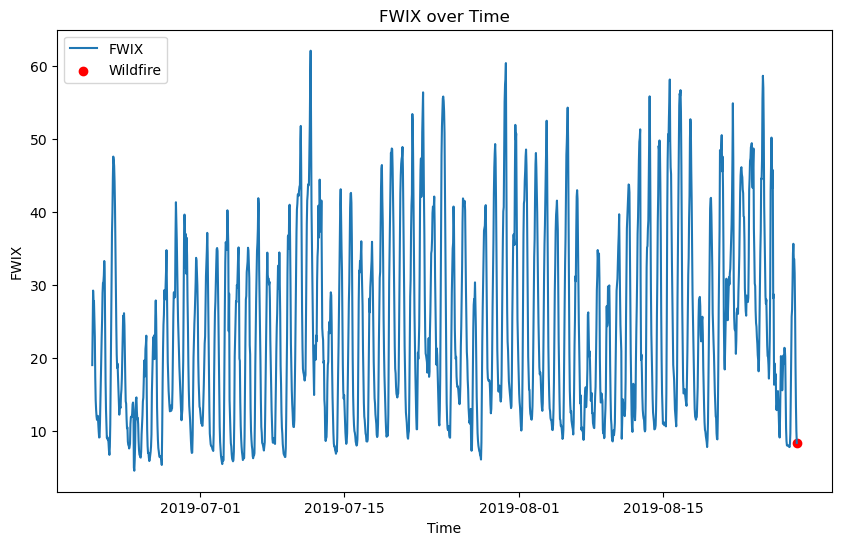

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ofmd = pd.read_csv('2019outputWithFWIbyHour.csv')

# Convert 'hourly.time' to datetime
ofmd['hourly.time'] = pd.to_datetime(ofmd['hourly.time'])

plt.figure(figsize=(10,6))
plt.plot(np.array(ofmd['hourly.time']), np.array(ofmd['fwix']), label='FWIX')
plt.scatter(np.array(ofmd['hourly.time'].iloc[-1]), np.array(ofmd['fwix'].iloc[-1]), color='red', label='Wildfire')
plt.xlabel('Time')
plt.ylabel('FWIX')
plt.title('FWIX over Time')
plt.legend()
plt.savefig('2019fwix_byhour.png', dpi=300)
plt.show()

In [3]:
def total_precipitation(initial_date, final_date):
    # Convert 'hourly.time' to datetime format
    dmet['hourly.time'] = pd.to_datetime(dmet['hourly.time'])

    # Create a copy of the DataFrame and set 'hourly.time' as the index in the copy
    dmet_copy = dmet.copy()
    dmet_copy.set_index('hourly.time', inplace=True)

    # Select rows between initial_date and final_date

    selected_rows = dmet_copy.loc[initial_date:final_date]
    #print(selected_rows)

    total_precipitation = selected_rows['hourly.precipitation'].sum()
    #print(total_precipitation)
    return total_precipitation

In [8]:
import FWI

dmet_filtered = pd.read_csv('Samples/CopernicusToOpenMeteo/nearestStationInfoMidDay.csv')

start_index = 0 + 1 # O FWI é calculado a partir das 12h
LAT = 40.95
FFMCPrev = 94.76251983642578
DMCPrev = 52.3828125
DCPrev = 458.97113037109375


mts = {5: 31,6: 30,7: 31,8:31, 9:30, 10:31}


fwix_values = [None] * len(dmet_filtered)
ffmc_values = [None] * len(dmet_filtered)
dmc_values = [None] * len(dmet_filtered)
dc_values = [None] * len(dmet_filtered)
isi_values = [None] * len(dmet_filtered)
bui_values = [None] * len(dmet_filtered)


for i in range(start_index, len(dmet_filtered)):
    MONTH = (dmet_filtered.iloc[i]['hourly.time']).split('-')[1]
    DAY = (dmet_filtered.iloc[i]['hourly.time']).split('-')[2].split('T')[0]

    print(MONTH, DAY)

    TEMP = dmet_filtered.iloc[i]['hourly.temperature_2m']
    RH = dmet_filtered.iloc[i]['hourly.relative_humidity_2m']
    WIND = dmet_filtered.iloc[i]['hourly.wind_speed_10m']


    if(int(DAY) == 1):
        LAST_DAY = mts[int(MONTH) - 1]
        LAST_MONTH = str(int(MONTH) - 1)
        
        if(int(LAST_MONTH) < 10):
            LAST_MONTH = '0' + str(int(LAST_MONTH))
            
        initial_date = f'2015-{LAST_MONTH}-{LAST_DAY}T12:00'
        final_date = f'2015-{MONTH}-{DAY}T12:00'
    elif((int(DAY) < 10) and (int(DAY) > 1)):
        id = '0' + str(int(DAY)-1)
        fd = '0' + str(int(DAY))

        initial_date = f'2015-{MONTH}-{id}T12:00'
        final_date = f'2015-{MONTH}-{fd}T12:00'
    else:
        id = str(int(DAY)-1)
        fd = str(int(DAY))

        initial_date = f'2015-{MONTH}-{id}T12:00'
        final_date = f'2015-{MONTH}-{fd}T12:00'

    
    RAIN = total_precipitation(initial_date, final_date)
    
    FFMCPrev = FWI.FFMC(TEMP,RH,WIND,RAIN,FFMCPrev)
    DMCPrev = FWI.DMC(TEMP,RH,RAIN,DMCPrev,LAT,int(MONTH))
    DCPrev = FWI.DC(TEMP,RAIN,DCPrev,LAT,int(MONTH))
    isi = FWI.ISI(WIND, FFMCPrev)
    bui = FWI.BUI(DMCPrev,DCPrev)
    fwix = FWI.FWI(isi, bui)

    fwix_values[i] = fwix
    ffmc_values[i] = FFMCPrev
    dmc_values[i] = DMCPrev
    dc_values[i] = DCPrev
    isi_values[i] = isi
    bui_values[i] = bui


# Add the fwix_values list as a new column to the DataFrame
dmet_filtered['fwix'] = fwix_values
dmet_filtered['ffmc'] = ffmc_values
dmet_filtered['dmc'] = dmc_values
dmet_filtered['dc'] = dc_values
dmet_filtered['isi'] = isi_values
dmet_filtered['bui'] = bui_values


dmet_filtered.to_csv('Samples/CopernicusToOpenMeteo/nearestStationbyMidDayFWI.csv', index=False)

06 21
06 22
06 23
06 24
06 25
06 26
06 27
06 28
06 29
06 30
07 01
07 02
07 03
07 04
07 05
07 06
07 07
07 08
07 09
07 10
07 11
07 12
07 13
07 14
07 15
07 16
07 17
07 18
07 19
07 20
07 21
07 22
07 23
07 24
07 25
07 26
07 27
07 28
07 29
07 30
07 31
08 01
08 02
08 03
08 04
08 05
08 06
08 07
08 08
08 09
08 10
08 11
08 12
08 13
08 14
08 15
08 16
08 17
08 18
08 19
08 20
08 21
08 22
08 23
08 24
08 25
08 26
08 27
08 28
08 29
08 30
08 31
09 01
09 02
09 03
09 04
09 05
09 06
09 07
09 08
09 09
09 10
09 11
09 12
09 13
09 14
09 15
09 16
09 17
09 18
09 19
09 20
09 21
09 22
09 23
09 24
09 25
09 26
09 27
09 28
09 29


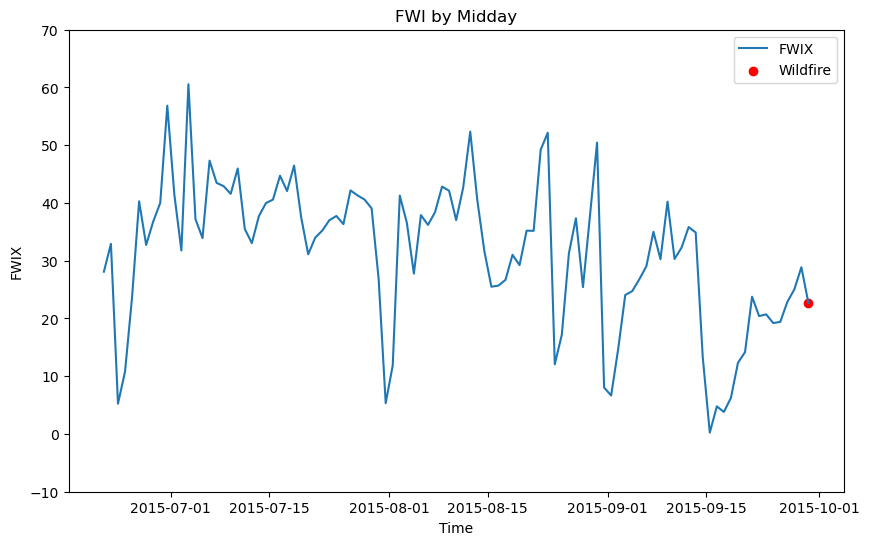

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ofmd = pd.read_csv('Samples/CopernicusToOpenMeteo/nearestStationbyMidDayFWI.csv')

# Convert 'hourly.time' to datetime
ofmd['hourly.time'] = pd.to_datetime(ofmd['hourly.time'])

plt.figure(figsize=(10,6))
plt.plot(np.array(ofmd['hourly.time']), np.array(ofmd['fwix']), label='FWIX')
plt.scatter(np.array(ofmd['hourly.time'].iloc[-1]), np.array(ofmd['fwix'].iloc[-1]), color='red', label='Wildfire')
plt.xlabel('Time')
plt.ylabel('FWIX')
plt.title('FWI by Midday')
plt.legend()

# Set y-axis limits
plt.ylim(-10, 70)

# Set y-axis ticks
plt.yticks(np.arange(-10, 71, 10))

plt.savefig('2015CalcFWI12.png', dpi=300)
plt.show()

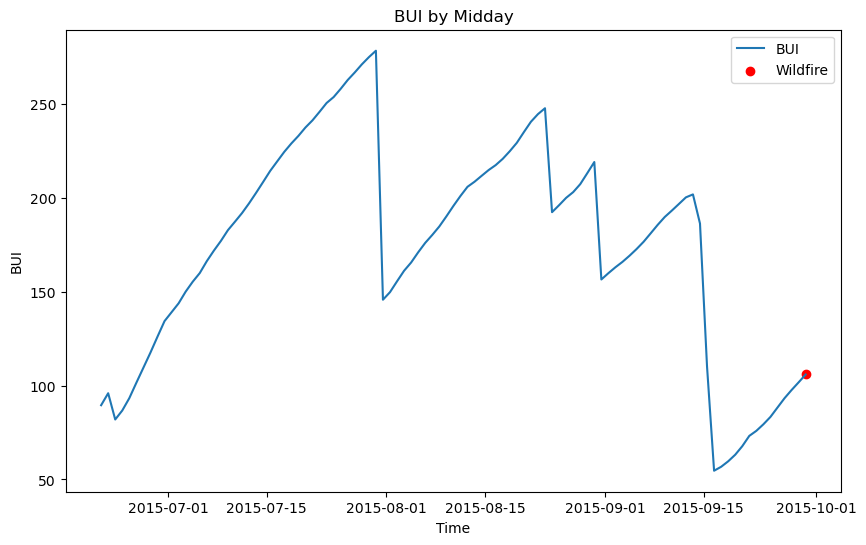

In [13]:
#Outras Variáveis

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ofmd = pd.read_csv('Samples/CopernicusToOpenMeteo/nearestStationbyMidDayFWI.csv')

# Convert 'hourly.time' to datetime
ofmd['hourly.time'] = pd.to_datetime(ofmd['hourly.time'])

plt.figure(figsize=(10,6))
plt.plot(np.array(ofmd['hourly.time']), np.array(ofmd['bui']), label='BUI')
plt.scatter(np.array(ofmd['hourly.time'].iloc[-1]), np.array(ofmd['bui'].iloc[-1]), color='red', label='Wildfire')
plt.xlabel('Time')
plt.ylabel('BUI')
plt.title('BUI by Midday')
plt.legend()

plt.savefig('2015CalcISI12.png', dpi=300)
plt.show()